# Law of large numbers

$$\lim_{N\rightarrow\infty}P(|y_N - \mu| > \epsilon) \rightarrow 0 \hspace{1cm}\forall \epsilon >0 $$

In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt

In first place we need a vector containing the results of $N$ experiments. This is done by using the "random.randint" command.

In [ ]:
N = 600 # assume to roll a dice N times
results = np.array([random.randint(1,6) for i in range(N)]) # turn the list into np array for plotting convenience
#print(results)

Now we need a function which computes the average from time to time, stores the results into a vector and then plots the average profile. The expected value of the dice rolling is 3.5, thus we expect the average estimator $y_N$ to approach 3.5 as $N$ grows.

In [ ]:
def av_estimator(x):
    av_values = []
    for i,j in enumerate(x): # i=index, j=element
        av_value = np.sum(x[:i])/(i+1) # calculate the average at each step
        av_values.append(av_value) # create a vector which contains all the averages
    return np.array(av_values)

In [ ]:
#print(av_estimator(results))

In [ ]:
trials = np.linspace(1, N, N)
plt.plot(trials,av_estimator(results), 'o')
plt.axhline(y = 3.5, color = 'r', linestyle = '-') # expected value
plt.xlabel('Experiment')
plt.ylabel('Average')
plt.show()

# Random walk

In first place we generate a list of $N$ experiments containing $+1$ or $-1$ (each step has length |1|). This is done with "random.randint" command. 

In [ ]:
import random

In [ ]:
#This function produces the different walks and also the grid to perform the plotting

def get_walk(N_steps):
    step_types = [-1,1] # here you can modify the length and direction of steps
    experiments =  np.array(list(range(0, N_steps, 1))) #produce the grid for plotting
    steps = np.array([random.choice(step_types) for j in range(N_steps)])
    #print(steps)
    return steps, experiments

Then we need a function which is evaluating the distance from the origin from time to time (i.e. from experiment to experiment).
This function makes use of the list produced at previous step and also return a list containing the position of the walker at each experiment. Element "i" of this list is simply equal to the sum of all the elements of list "experiments" with index lower than "i". Then the positions achieved at each step are displayed on a graph.

In [ ]:
def get_distances(steps):
    distances = []
    for i,j in enumerate(steps):
        distance = np.sum(steps[:i]) # sum all the elements coming before (I guess that there is a less copmutationally-expensive way)
        distances.append(distance)
    return np.array(distances)

#print(get_distances(steps))    

Let us verify the law of large numbers. The average should converge to the expected value of the random walk (which is zero) and the probability of observing fluctuations from the expected value should vanish with the increasing number of experiments.

In [ ]:
N_walkers = 1
N_steps = 500

for i in range(N_walkers):
    steps, experiments = get_walk(N_steps) # 500 steps
    fig, ax = plt.subplots(1, 1, figsize=(15,4))
    plt.plot(experiments, get_distances(steps), '-')
    plt.axhline(y = 0, color = 'r', linestyle = '-') # expected value
    plt.xlabel('Experiment')
    plt.ylabel('Walker position')
    plt.grid(True)
    plt.show()
    
    # here we veirfy the law of large numbers
    fig2, ax2 = plt.subplots(1, 1, figsize=(15,4))
    plt.plot(experiments, av_estimator(steps), 'o')
    plt.axhline(y = 0, color = 'r', linestyle = '-') # expected value
    plt.xlabel('Experiment')
    plt.ylabel('Average')
    plt.grid(True)
    plt.show()

We now try to make an animation of the random walk.

In [ ]:
from matplotlib.animation import PillowWriter

In [ ]:
# Here we make the animation of three walkers

N_steps = 1000

metadata = dict(title = 'Random walk')
writer = PillowWriter(fps = 10, metadata = metadata)

fig = plt.figure()
l1, = plt.plot([], [], 'b-', label="Walker 1")
l2, = plt.plot([], [], 'r-', label="Walker 2")
l3, = plt.plot([], [], 'g-', label="Walker 3")

plt.axhline(y = 0, color = 'k', linestyle = '--') # expected value
plt.grid(True)
plt.xlabel('Step')
plt.ylabel('Position')
plt.legend(loc='upper right', ncol=3)
plt.title('Random walk')

xvals1 = []
yvals1 = []
yvals2 = []
yvals3 = []

with writer.saving(fig, "Random_Walk.gif", 100):
    steps1, experiments1 = get_walk(N_steps)
    steps2, experiments2 = get_walk(N_steps)
    steps3, experiments3 = get_walk(N_steps)
    distances1 = list(get_distances(steps1))
    distances2 = list(get_distances(steps2))
    distances3 = list(get_distances(steps3))
    plt.xlim(0, 1000)
    # in order to set max and min on the vertical exis we have to check all the trajectories and select absolute max and min
    max_min_distances = [max(distances1), max(distances2), max(distances3), min(distances1), min(distances2), min(distances3)]
    plt.ylim(min(max_min_distances)-10, max(max_min_distances)+10) 
    for j, experiment in  enumerate(list(experiments1)):
        xvals1.append(experiment)
        yvals1.append(distances1[j])
        yvals2.append(distances2[j])
        yvals3.append(distances3[j])
        
        l1.set_data(xvals1, yvals1)
        l2.set_data(xvals1, yvals2)
        l3.set_data(xvals1, yvals3)
        
        writer.grab_frame()
    


In [ ]:
# verify large numbers law (just for the first walker)

metadata = dict(title = 'Law of large numbers')
writer = PillowWriter(fps = 10, metadata = metadata)

fig = plt.figure()
l, = plt.plot([], [], 'b-')
plt.xlim(0, 1000)
plt.ylim(-1, 1)
plt.axhline(y = 0, color = 'r', linestyle = '-') # expected value
plt.grid(True)
plt.xlabel('Experiment')
plt.ylabel('Average')
plt.title('Law of large numbers')

xvals = []
yvals = []

with writer.saving(fig, "Large_numbers.gif", 100):
    averages = list(av_estimator(steps1))
    for j, experiment in  enumerate(list(experiments1)):
        xvals.append(experiment)
        yvals.append(averages[j])
        
        l.set_data(xvals, yvals)
        
        writer.grab_frame()
    

# Central limit theorem

$$P_{N}(x) \xrightarrow[N\rightarrow\infty]{} \frac{1}{\sqrt{2\pi N^2}} e^{-\frac{x^2}{2N^2}}$$

Now we want to visualize the central limit theorem. In order to do this we require a huge number of walkers. We need a function which creates a list of lists. Each of these lists contains one random walk.

In [ ]:
def list_of_walks(N_walkers, N_steps):
    walks = []
    for i in range(N_walkers):
        steps, experiments = get_walk(N_steps) 
        walk = get_distances(steps)
        walks.append(walk)
    
    return np.array(experiments), np.array(walks)

In [ ]:
# Here we plot all the walkers, this is optional, since we are using a huge number of walkers 
# (otherwise we cannot verify central limit theorem) it is preferable to comment this section
'''
fig, ax = plt.subplots(1, 1, figsize=(15,4)) 
plt.axhline(y = 0, color = 'r', linestyle = '-') # expected value
plt.xlabel('Experiment')
plt.ylabel('Walker position')
plt.grid(True)

experiments, walks = list_of_walks(N_walkers, N_steps)
for i in walks:
    plt.plot(experiments, i, '-')
plt.show()

'''

Now we want to verify that the average position of the walkers is described by a Gaussian. Thus we have to take the last position of each walker and then check whether the distribution of these positions respects a Gaussian distribution with variance equal to the number of steps and zero mean.

In [ ]:
# This function receives a list of random walks and creates a list containing the last position of each walk
# Then, this list will be used to check whether, in the limit of a large number of walkers and for a sufficiently large number
# of steps, the distribution of the walks resembles the Gaussian described by the central limit theorem.

def get_last_points(walks):
    last_points = []
    for walk in walks:
        last_points.append(walk[:-1])
    return np.array(last_points)

In [ ]:
N_walkers = 1000
N_steps = 1000

experiments, walks = list_of_walks(N_walkers, N_steps)
last_points = get_last_points(walks)

plt.figure(figsize=(8,8))
plt.hist(last_points, bins=30, density=True, histtype='barstacked')
plt.show()

print(f"The mean of the random walks is: {np.mean(last_points)}")
print(f"The variance of the random walks is: {2*np.var(last_points)}")

We notice that the mean is always next to zero and the variance is near to the number of steps. Thus the central limit theorem for the random walk is verified. There are two facts that have to be stated. The first one is that the program fails for a number of walkers in range 3000. Then, the actual formulation of the central limit theorem requires a number of walkers which is even larger (about $10^{23}$) than the one which we are able to handle on the computer. Thus, if we were able to reach a higher number of walkers, we could get an average which is even nearer to zero.

# Visualizing the diffusion 

Here we make an animation which allows us to visualize the process of diffusion taking place. We know both the diffusion equation (in absence of external forces for now) and its solution:

$$\frac{\partial \rho(x,t)}{\partial t} = D\frac{\partial^2 \rho(x,t)}{\partial x^2} \hspace{1cm} \rho(x,t) = \frac{1}{\sqrt{2\pi (\sigma^2 + 2Dt)}}e^{-\frac{x^2}{2(\sigma^2 + 2Dt)}} \hspace{1cm} D = k_B T\mu$$

$\sigma^2$ is the variance of the density at time $t=0$ i.e. in the instant before the diffusion process takes place. Thus, if we hypothesize that the density is highly localized at the initial time instant, we can set this value to zero.

In [ ]:
from math import pi
from matplotlib import animation
from matplotlib.animation import PillowWriter

In [ ]:
# This fucntion produces the Gaussian representing the density

def density(x, y, t, sigma_in, D):
    norm = 1/np.sqrt(2*pi*(sigma_in**2 + 2*D*t))
    exponential = np.exp(-(x**2 + y**2) / (2*(sigma_in**2 + 2*D*t)))
    return norm*exponential

In [ ]:
metadata = dict(title = 'Law of large numbers')
writer = PillowWriter(fps = 10, metadata = metadata)

x = np.linspace(-5,5,100)

fig = plt.figure()
l, = plt.plot([], [], 'b-', label='D= 1')
l2, = plt.plot([], [], 'r-', label = 'D=0.1')
l3, = plt.plot([], [], 'g-', label = 'D=2')
plt.xlim(-5, 5)
plt.ylim(-0.1, 1.5)
plt.grid(True)
plt.legend(loc='upper right')
#time_text = ax.text(0.65, 0.95, '', fontsize=15, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Diffusion in 1 dimension')

def animate(i):
    l.set_data(x, density(x, 0, 1/50*i , 0.01, 1))
    l2.set_data(x, density(x, 0, 1/50*i , 0.01, 0.1))
    l3.set_data(x, density(x, 0, 1/50*i , 0.01, 2))
    #time_text.set_text('t={:.2f}'.format(i/50))
    
ani = animation.FuncAnimation(fig, animate, frames=240, interval=50)
ani.save(r'C:\Users\matti\Downloads/Diffusion_1D.gif', writer='pillow', fps=100, dpi=100)

Next step is to produce another animation but in 3D. Thus we require 2 space dimensions.

In [ ]:
x = np.linspace(-4,4, 100)
y = np.linspace(-4,4, 100)
xv, yv = np.meshgrid(x, y)

plt.contourf(xv, yv, density(xv, yv, 0.1, 0.1, 1), levels=30, cmap='plasma')  #f = filled in, add vmin or vmax to turn all the points below or above a certain value of the same colour
plt.colorbar(label='Density')
plt.show()

fig, ax = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(12,8))
ax.plot_surface(xv, yv, density(xv, yv, 0.1, 0.1, 1), cmap='plasma')
#ax.plot_surface(xv, yv, density(xv, yv, 5, 0.1, 1), cmap='plasma')

plt.show()

In [ ]:
fig = plt.figure()
plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')


def animate(n):
    ax.cla()

    ax.plot_surface(xv, yv, density(xv, yv, 1/100*n, 0.1, 0.1))
    ax.set_zlim(-1, 3)

    return fig,


ani = animation.FuncAnimation(fig, animate, frames=500, interval=5)
ani.save(r'C:\Users\matti\Downloads/Diffusion_3D.gif', writer='pillow', fps=10, dpi=100)

# Markov chains

In [ ]:
transition_dict = {'Avezzano': [0.5, 0.15, 0.25, 0.1], 
              'Borgo Via Nuova': [0.3, 0.4, 0.2, 0.1], 
              'Borgo Ottomila': [0.2, 0.6, 0.1, 0.1],
              'Cerchio': [0.2, 0.15, 0.5, 0.15]}

In [ ]:
#Turn the dictionary into a np array
transition_matrix = np.array([transition_dict['Avezzano'], transition_dict['Borgo Via Nuova'], transition_dict['Borgo Ottomila'], transition_dict['Cerchio']])

We would like to see how thew Markov chain approaches equilibrium. This fact is ensured by the ergodic theorem. Then, by Perron-Frobenius theorem, we can assert that the equilibrium state is unique and is achieved for whatever initial condition.

$$\vec{\pi}^{eq} = \lim_{t\rightarrow\infty} \vec{\pi}^{0}P^t$$

A first away of finding the equilibrium distribution consists in simply applying the formula above. Thus we need a function which is multiplying the transition matrix by itself a specified number of times until convergence is observed. Then, the equilibrium matrix (which is expected to have equal rows with non-zero elements), is multiplied by the initial condition vector. This method is the most brutal and unconvenient one from the computational point of view.

In [ ]:
def iterate(transition_matrix, max_iter):
    threshold = 10**-8
    old_matrix = transition_matrix
    
    iteration = 0
    while iteration < max_iter:
        new_matrix = old_matrix @ transition_matrix
        
        # The relative error check is made only on one element of the matrix, I guess that this feature can be improved
        rel_err = abs(old_matrix[1,1] - new_matrix[1,1]) / old_matrix[1,1]
        
        if rel_err > threshold:
            old_matrix = new_matrix
            iteration +=1
        else:
            print(f"Convergence achieved at iteration number: {iteration}.")
            return new_matrix 

In [ ]:
equilibrium_matrix = iterate(transition_matrix, 500)
print(equilibrium_matrix)

In [ ]:
pi0 = np.array([1, 0, 0, 0]) #i.e. we are in Avezzano at time t=0
eq_distribution = pi0 @ equilibrium_matrix

Th best way to find the equilibrium distribution is to apply Perron-Frobenius theorem, thus we have to solve the following eigevvalue equation:

$$\vec{\pi}^{eq} = \vec{\pi}^{eq} P$$

The equilibrium vector $\vec{\pi}^{eq}$ is the (only) eigenvector with associated eigenvalue equal to 1.

In [ ]:
import scipy.linalg

In [ ]:
eigenvalues, eigenvectors = scipy.linalg.eig(transition_matrix, right = False, left = True)

pi = eigenvectors[:,0] # select the eigenvalue associated to eigenvalue 1
pi_normalized = [(x/np.sum(pi)).real for x in pi]
print(pi_normalized)

# 1-D Ising model

Let us study the 1-dimensional Ising model. In first place we need a function which produces an array of pins $s_i = \pm 1$. The  arguments to be passed to this function are the number of spins and the number of up and down spins, if we want to create some specific configuration.

In [ ]:
from random import sample

In [ ]:
def get_spin_array(N_spins, N_up, N_down):
    list_of_spin_down = [-1 for i in range(N_down)]
    list_of_spin_up = [1 for i in range(N_up)]
    spin_array = sample(list_of_spin_down + list_of_spin_up, len(list_of_spin_down + list_of_spin_up))
    return np.array(spin_array)

Now we need a function evaluating the energy of our spin array. The Hamiltonian for the 1-D Ising model in presence of an external magnetic field $h$ is:

$$H = -J\sum_{i=0}^{N-1} s_i s_{i+1} - h\sum_{i=0}^{N-1} s_i $$

Let us also impose the periodic boundary conditions: $s_{N+1} = s_0$. This is required because, as long as we are considering a very small number of spins (i.e. we are not in the thermodynamical limit), this further contribution could be relevant. We define a function that computes the two different sums and combines them together.

In [ ]:
def get_array_energy(spin_array, J, h):
    
    periodic_boundary = spin_array[0]*spin_array[-1]
    H1 = 0
    for i in range(len(spin_array)-1): # all spin-spin interactions except the boundary one
        H1 = H1 + spin_array[i]*spin_array[i+1]
    H1 = H1 + periodic_boundary
        
    H2 = np.sum(spin_array)
    
    return -J*H1 + (-h*H2)

In [ ]:
def magnetization_per_spin(spin_array):
    m = np.mean(spin_array)
    return m

It is now time to study the approach to equilibrium i.e. to find the equilibrium configuration, starting from a random one, in presence of a certain temperature.

In [ ]:
def metropolis_monte_carlo(spin_array, T, max_iter, J, h):
    all_configurations = [] # list with all Monte-Carlo configurations, needed for animation
    all_configurations.append(spin_array)
    
    all_magnetizations = [] # list with all magnetizations, needed for animation
    all_magnetizations.append(magnetization_per_spin(spin_array))
    
    # Here we start with Monte-Carlo method
    
    current_spin_array = spin_array
    current_energy = get_array_energy(current_spin_array, J, h)
    current_magnetization = magnetization_per_spin(spin_array)
    
    r = np.random.random() # sort a float in range 0,1
    
    # flip one random spin in the lattice and evaluate the new energy
    k_B = 1
    iteration = 0
    while iteration < (max_iter-1):
        
         
        flipping_loc = random.randint(0, len(current_spin_array)-1)
        new_spin_array = [spin for spin in current_spin_array] # make a copy of the current spin array
        new_spin_array[flipping_loc] *= -1 # flip the spin at desired location
        new_spin_array_energy = get_array_energy(new_spin_array, J, h) # calculate the energy of the new spin array
        new_spin_array_magnetization = magnetization_per_spin(new_spin_array)
        
        exponential = np.exp(-(1/(k_B*T[iteration]))*(new_spin_array_energy - current_energy ))
        
        if r < min(1, exponential):
            # accept the new configuration
            current_spin_array = new_spin_array
            current_energy = new_spin_array_energy
            current_magnetization = new_spin_array_magnetization
            all_configurations.append(np.array(current_spin_array))
            all_magnetizations.append(magnetization_per_spin(current_spin_array))
            print(f"Iteration {iteration+1}: {current_spin_array}, energy: {current_energy} , magnetization: {current_magnetization}")
            
        else:
             # keep the old configuration
            new_spin_array[flipping_loc] *= -1 # flip the spin to re-obtain the old configuration
            current_spin_array = new_spin_array
            current_magnetization = new_spin_array_magnetization
            all_configurations.append(np.array(current_spin_array))
            all_magnetizations.append(magnetization_per_spin(current_spin_array))
            print(f"Iteration {iteration+1}: {current_spin_array}, energy: {current_energy} , magnetization: {current_magnetization}")
        
        iteration += 1
    
    return all_configurations, all_magnetizations    

In [ ]:
def magnetic_field(time, variable): # variable can be any time-dependent magnetic fied
    h = 4
    if variable == True:
        h1 = [4 for t in range(1,int(time/2))]
        h2 = [ 0 for t in range(int(time/2), int(time+1))]
        fields = h1 + h2
        return fields
    else:
        fields = [h for i in range(0,time)]
        return fields

In [ ]:
def temperature(time, T, variable): # variable can be any time-dependent temperature
    if variable == True:
        temperatures1 = [T for t in range(1,int(time/2))] # half of the time T
        temperatures2 = [ T*190 for t in range(int(time/2), int(time+1))] # hlaf of the time 100*T
        temperatures = temperatures1 + temperatures2
        #temperatures = np.array(list(range(0, time, 1)))
        #return temperatures*0.1
        #print(temperatures)
        return temperatures
    else:
        temperatures = [T for i in range(0,time)]
        return temperatures

In [ ]:
N_spins = 50
N_up = 25
J = 1
k_B = 1
max_iter = 500
#h = magnetic_field(max_iter, False)
h = 4
T = temperature(max_iter, 0.1, True) # if False, temperature will be constant, otherwise it will be varaible in time

#test_spin_array1 = [1, -1, 1, -1, 1, -1, 1, -1, 1, -1]
#test_spin_array2 = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]

spin_array = get_spin_array(N_spins, N_up, N_spins - N_up)
spin_array_energy = get_array_energy(spin_array, J, h)
spin_array_magn = magnetization_per_spin(spin_array)
print(f"Array of {N_spins} spins, {N_up} are up, {N_spins - N_up} are down: {spin_array}, energy: {spin_array_energy}, magnetization: {spin_array_magn}")

print("")

equilibrium_configuration = metropolis_monte_carlo(spin_array, T, max_iter, J, h)

Let us make an animation of Monte-Carlo simulation. In first place we need a function which plots the spin array produced at a given iteration. 

In [ ]:
def plot_array(spin_array):
    spin_array = np.array(spin_array)
    y = [0 for i in range(0, len(spin_array) + 1)] # all spin are alligned along x-axis
    for index, spin in enumerate(spin_array):
        if spin == 1:
            plt.scatter(index, 0, color='m', marker='s', label='up', edgecolors='k')
        else:
            plt.scatter(index, 0, color='y', marker='s', label='down', edgecolors='k')



In [ ]:
import matplotlib.animation as animation

metadata = dict(title = '1D_Ising_model')
writer = PillowWriter(fps = 10, metadata = metadata)

spin_positions = np.array(list(range(0, N_spins, 1)))

fig, ax = plt.subplots(1, 1, figsize=(8,4))
l, = plt.plot([], [])
time_text = ax.text(0.05, 0.9, '', fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
temp_text = ax.text(0.3, 0.9, '', fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
field_text = ax.text(0.61, 0.9, '', fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
N_spin_text = ax.text(0.05, 0.7, '', fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
#N_up_text = ax.text(0.3, 0.7, '', fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
#N_down_text = ax.text(0.61, 0.7, '', fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
magn_text = ax.text(0.3, 0.7, '', fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
plt.legend(loc='lower right', ncol=2)
plt.ylim(-1, 1.5)
plt.grid(True)

plt.xlabel('Spin locations')
plt.title('1-dimensional Ising model')

def animate(iteration):
    time_text.set_text('Iteration={:.2f}'.format(iteration))
    temp_text.set_text('Temperature={:.2f} K'.format(T[iteration]))
    field_text.set_text('Field={:.2f}'.format(h))
    N_spin_text.set_text('Spins={:.2f}'.format(N_spins))
    #N_up_text.set_text('Spins up={:.2f}'.format(list(equilibrium_configuration[0][iteration]).count(1)))
    #N_down_text.set_text('Spins down={:.2f}'.format(list(equilibrium_configuration[0][iteration]).count(-1)))
    magn_text.set_text('m={:.2f}'.format(equilibrium_configuration[1][iteration]))
    l.set_data(spin_positions, plot_array(equilibrium_configuration[0][iteration]))


ani = animation.FuncAnimation(fig, animate, frames=len(equilibrium_configuration[0]), interval=100)
ani.save(r'C:Ising_1D.gif', writer='pillow')

Here we make an animation of the evolution of magnetization per spin $m = \langle s_i\rangle$. Then we can play with control parameters i.e. temperature and magnetic field. We can verify that, if there is no magnetic field turned on, the one-dimensional system experiences no spontaneous magnetization even if we are under the critical temperature. This is a typical carachteristic of 1D Ising model which is explained by Wagner-Mermin theorem: continuous symmetries cannot be spontaneously broken at finite temperatures, in finite systems with low-range interactions and a number of dimensions smaller or equal than 2.

In [ ]:
# magnetization

metadata = dict(title = 'Magnetization')
writer = PillowWriter(fps = 10, metadata = metadata)

fig, ax = plt.subplots(1, 1, figsize=(8,4))
l, = plt.plot([], [], 'b-')
time_text = ax.text(0.05, 0.9, '', fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
temp_text = ax.text(0.3, 0.9, '', fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
field_text = ax.text(0.61, 0.9, '', fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
plt.xlim(0, len(equilibrium_configuration[0]))
plt.ylim(-1.5, 2)
plt.axhline(y = 0, color = 'k', linestyle = '--') 
plt.axhline(y = 1, color = 'r', linestyle = '-') 
plt.axhline(y = -1, color = 'r', linestyle = '-') 
plt.grid(True)
plt.legend(loc='upper right')
plt.xlabel('Iteration')
plt.ylabel('Magnetization per spin')

xvals = []
yvals = []

with writer.saving(fig, "Magnetization.gif", 100):
    magnetizations = equilibrium_configuration[1] # "n magnetizations" list is n+1 elements long
    for iteration, magnetization in  enumerate(list(magnetizations)):
        xvals.append(iteration)
        yvals.append(magnetization)
        
        time_text.set_text('Iteration={:.2f}'.format(iteration))
        temp_text.set_text('Temperature={:.2f} K'.format(T[iteration]))
        field_text.set_text('Field={:.2f}'.format(h))
        l.set_data(xvals, yvals)
        
        writer.grab_frame()
    

Let us now study the correlation length at various distances. Thus we choose one spin and calculate the correlation with all the others at different temperatures. We want to notice that the maximum correlation is achieved at the critical temeprature. In particular, in this first phase, we want to study equilibrium equal-time spatial correlations. Hence we first need to find the equilibrium state and then we study the correlation. In first place we need a function which receives multiple spin arrays which have been produced at a given temperature and calculates the correlation between spin at location zero and all the others.

## Attention

This part of the code is not working currently

In [ ]:
def get_correlations(matrix_of_configurations):
    
    col_max = len(list(matrix_of_configurations[0]))
    number_of_iterations = len(matrix_of_configurations)
    matrix = np.array(matrix_of_configurations)
    
    average_spins = []
    for col in range(col_max-1):
        #average_spin = np.mean(matrix[:,col])
        average_spin = sum(matrix[:,col])/number_of_iterations
        average_spins.append(average_spin)
    
    #print(f"Av spins = {average_spins}")
    
    average_products = []
    spin_spin_products = []
    
    for col in range(col_max-1):        
        for configuration in matrix_of_configurations:
            spin_spin_prod = configuration[0]*configuration[col]
            spin_spin_products.append(spin_spin_prod)
        average_products.append(sum(spin_spin_products)/number_of_iterations)
        #print(f"Spin-spin products:{spin_spin_products}")
        spin_spin_products.clear()
        
        #average_product = np.mean(matrix[:,0]@matrix[:,col])
        #average_products.append(average_product)
    
    print("")
    print(f"Av products = {average_products}")
    
    correlations = []
    first_av_spin = average_spins[0] # average value of the spin at which we are pointing
    for av_prod, av_spin in zip(average_products, average_spins):
        correlations.append(av_prod - (first_av_spin*av_spin))
        
    return correlations



In [ ]:
N_spins = 100
N_up = 50
J = 1
k_B = 1
max_iter = 200
#h = magnetic_field(max_iter, False)
h = 4

# Set three different constant temperatures

temperatures = [temperature(max_iter, i, False) for i in [0.1]]

spin_array = get_spin_array(N_spins, N_up, N_spins - N_up)
spin_array_energy = get_array_energy(spin_array, J, h)
spin_array_magn = magnetization_per_spin(spin_array)
print(f"Array of {N_spins} spins, {N_up} are up, {N_spins - N_up} are down: {spin_array}, energy: {spin_array_energy}, magnetization: {spin_array_magn}")

fig = plt.figure(figsize=(8,4))
distances = np.array(list(range(0, N_spins-1, 1)))
plt.grid(True)
plt.xlabel('Spin locations')
plt.ylabel('Correlation')
plt.title('Correlations at three different temperatures')

for temp in temperatures:
    
    equilibrium_configuration = metropolis_monte_carlo(spin_array, temp, max_iter, J, h)
    correlations = get_correlations(equilibrium_configuration[0])
    print("")
    print(f"Correlations = {correlations}")
    plt.plot(distances, correlations, 'o', label=f'{temp[0]}')
    plt.legend(loc='upper right')

plt.show()


# 2-D Ising model

Here we have to take into account the presence of spins distributed over a NxN grid. Thus, the spin-spin interaction is verified for all the first neighbours. We can recycle the approach used for the 1-D Ising model by appropriately modifying the functions.
in this case, the energetic contribution of one spin is:

$$E_{ij} = -J[s_{ij}s_{i-1,j} + s_{ij}s_{i+1,j} + s_{ij}s_{i,j-1} + s_{ij}s_{i,j+1}] - hs_{ij}$$

Then, the energy of the entire lattice is:

$$H = -J\sum_{i=0}^{N-1}\sum_{\langle i,j\rangle}s_{i}s_{i+1} - h\sum_{i,j}s_{i,j}$$

Where the notation $\langle i,j\rangle$ is indicatig the nearest neighbours of spin $s_{ij}$.

In first place we need a function which generates a random spin grid. This function receives the number of rows and columns and the number of up spins.

In [ ]:
def get_spin_grid(N_rows, N_cols, N_up):
    # N_rows is the number of rows
    # N_cols is the number of columns i.e. the number of spins per row
    grid = [] # will become a list of lists
    N_down = N_cols - N_up # number of down spins in one row
    for spin_array in range(N_rows):        
        #for spin in range(N_cols):
        list_of_spin_down = [-1 for i in range(N_down)]
        list_of_spin_up = [1 for i in range(N_up)]
        spin_array = sample(list_of_spin_down + list_of_spin_up, len(list_of_spin_down + list_of_spin_up))
        grid.append(spin_array)
    return np.array(grid)

Now we create another function which displays the grid.

In [ ]:
def plot_grid(grid):
    # first generate the vertical positions
    ys = np.array(list(range(0, len(grid), 1)))
    for y, row in zip(reversed(ys), grid):
        for index, spin in enumerate(row):
            if spin == 1:
                #plt.scatter(index, y, color='m', marker='s', label='up') # edgecolors='k'
                plt.plot(index, y, color='m', marker='s', label='up') # edgecolors='k'
            else:
                #plt.scatter(index, y, color='y', marker='s', label='down')
                plt.plot(index, y, color='y', marker='s', label='down')

Now we need a function which calculates the grid energy. Here we are not imposing periodic boundary conditions, thus we have to take into account that spins at the edges of the grides will have less nearest neighbours. For example, spin $s_{00}$ will have energy: $E_{00} = -J[s_{00}\cdot s_{01} + s_{00}\cdot s_{10}] - hs_{00}$. Hence, for each spin we have to identify the coordinates of the nearest neighbour. If such coordinates are found outside the grid, then it means that there is no neighbour in that direction and the energy contribtuion for that spin is zero.

In [ ]:
def get_grid_energy(grid, J, h):
    
    H1 = 0
    H2 = 0
    for row_index, row in enumerate(grid):
        for spin_index, spin in enumerate(row):
            # here we must verify that nearest neighbours are inside the grid
            
            # let us first calculate the contribution at the right of the current spin
            if (spin_index+1) < len(row):
                E_right = spin*row[spin_index+1]
            else:
                E_right = 0
            
            # let us now calcualte the contribution at the left of the current spin
            if (spin_index-1) >= 0:
                E_left = spin*row[spin_index-1]
            else:
                E_left = 0
                
            # let us now calculate the contribution at the top of the current spin
            if row_index-1 >= 0:
                E_top = spin*grid[row_index-1][spin_index]
            else:
                E_top = 0
                
            # let us now calculate the contribution at the bottom of the current spin
            if row_index+1 < len(grid):
                E_bottom = spin*grid[row_index+1][spin_index]
            else:
                E_bottom = 0
                
            H1 += E_right + E_left + E_top + E_bottom
            
            #print(f"H1: {H1}")
            
    H2 = np.sum(grid)
    #print(f"H2: {H2}")
    
    return -J*H1 - h*H2

In [ ]:
def get_magnetization(grid):
    return np.mean(grid)

In [ ]:
def magnetic_field(time, variable): # variable can be any time-dependent magnetic fied
    h = 4
    if variable == True:
        h1 = [4 for t in range(1,int(time/2))]
        h2 = [ 0 for t in range(int(time/2), int(time+1))]
        fields = h1 + h2
        return fields
    else:
        fields = [h for i in range(0,time)]
        return fields

In [ ]:
def temperature(time, T, variable): # variable can be any time-dependent temperature
    if variable == True:
        temperatures1 = [T for t in range(1,int(time/2))] # half of the time T
        temperatures2 = [ T*190 for t in range(int(time/2), int(time+1))] # hlaf of the time 100*T
        temperatures = temperatures1 + temperatures2
        #temperatures = np.array(list(range(0, time, 1)))
        #return temperatures*0.1
        #print(temperatures)
        return temperatures
    else:
        temperatures = [T for i in range(0,time)]
        return temperatures

It is now time to implement Metropolis Monte-Carlo algorithm for a grid of spins rather than for a one-dimensional array. The procedure is exactly the same, we just have to adapt the previous function to the 2-dimensional case. 

In [ ]:
def metropolis_monte_carlo(grid, J, T, h, max_iter):
    
    
    all_configurations = [] # list with all Monte-Carlo configurations (i.e. a list containing matrices), needed for animation
    all_configurations.append(grid)
    
    all_magnetizations = [] # list with all magnetization densities, needed for animation
    all_magnetizations.append(get_magnetization(grid))
    
    # here we start Monte-Carlo method
    
    # Let us define the initial configuration, calculate its energy and magnetization
    current_grid = grid
    current_energy = get_grid_energy(current_grid, J, h)
    current_magnetization = get_magnetization(current_grid)
    
    r = np.random.random() # sort a float in range (0,1), which is our accepatance level
    
    k_B = 1
    iteration = 0
    while iteration < max_iter:
        
        # generate a random position on the grid (i.e. a tuple) where we can flip the spin
        flipping_coordinates = np.array([random.randint(0, len(grid[0])-1), random.randint(0, len(grid)-1)])
        new_grid = np.array([row for row in current_grid]) # make a copy of the current spin grid
        new_grid[flipping_coordinates[0]][flipping_coordinates[1]] *= -1 # flip the spin at desired location
        new_grid_energy = get_grid_energy(new_grid, J, h) # calculate the energy of the new spin grid
        new_grid_magnetization = get_magnetization(new_grid) # calculate the new magnetization density
        
        exponential = np.exp(-(1/(k_B*T[iteration]))*(new_grid_energy - current_energy ))
        
        if r < min(1, exponential):
            # accept the new configuration
            current_grid = new_grid
            current_energy = new_grid_energy
            current_magnetization = new_grid_magnetization
            all_configurations.append(np.array(current_grid))
            all_magnetizations.append(get_magnetization(current_grid))
            #print(f"Iteration {iteration+1}: {current_grid}, energy: {current_energy} , magnetization: {current_magnetization}")
            
        else:
             # keep the old configuration
            new_grid[flipping_coordinates[0]][flipping_coordinates[1]] *= -1 # flip the spin to re-obtain the old configuration
            current_grid = new_grid
            current_magnetization = new_grid_magnetization
            all_configurations.append(np.array(current_grid))
            all_magnetizations.append(get_magnetization(current_grid))
            #print(f"Iteration {iteration+1}: {current_grid}, energy: {current_energy} , magnetization: {current_magnetization}")
        
        iteration += 1
    
    return all_configurations, all_magnetizations    

In [ ]:
N_rows = 10
N_cols = 10
total_spins = N_rows*N_cols
N_up = 5 # number of spin up per row
total_up = N_up*N_rows #total number of spin up

max_iter = 100
h = 2
J = 1
T = temperature(max_iter+1, 0.1, False)

initial_grid = get_spin_grid(N_rows, N_cols, N_up)
initial_energy = get_grid_energy(initial_grid, J, h)
initial_magnetization = get_magnetization(initial_grid)
print(f"Grid of {total_spins} spins, {total_up} are up, {total_spins - total_up} are down")
print(f"Energy: {initial_energy}, magnetization: {initial_magnetization}")
plot_grid(initial_grid)
print("")

equilibrium_configuration = metropolis_monte_carlo(initial_grid, J, T, h, max_iter)

In [ ]:
plot_grid(equilibrium_configuration[0][max_iter-1])
print(f"magnetization per spin: {equilibrium_configuration[1][max_iter-1]}")

## Attention:  
The animations are saved in mp4 format, thus ffmpeg is needed on your computer. If you are unable to install it, run the instructions on Google Colab and everything will work fine. Alternatively you can use another writer (like the one used in previous sections) and produce gif animations (though it will require a lot of time and the relust will be very low-quality).

Let us start from the animation of magnetization density since it is going to need less time than the spin grid animation.

In [ ]:
# magnetization
from matplotlib.animation import FFMpegWriter, writers

metadata = dict(title = 'Magnetization_density')
Writer = writers['ffmpeg']
writer = Writer(fps=20, metadata={'artist': 'Me'}, bitrate=1000)

fig, ax = plt.subplots(1, 1, figsize=(8,4))
l, = plt.plot([], [], 'b-')
time_text = ax.text(0.05, 0.9, '', fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
temp_text = ax.text(0.3, 0.9, '', fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
field_text = ax.text(0.61, 0.9, '', fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
plt.xlim(0, len(equilibrium_configuration[0]))
plt.ylim(-1.5, 2)
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.axhline(y = 1, color = 'r', linestyle = '-')
plt.axhline(y = -1, color = 'r', linestyle = '-')
plt.grid(True)
plt.legend(loc='upper right')
plt.xlabel('Iteration')
plt.ylabel('Magnetization per spin')

xvals = []
yvals = []

with writer.saving(fig, "Magnetization.mp4", 100):
    magnetizations = equilibrium_configuration[1] # "n magnetizations" list is n+1 elements long
    for iteration, magnetization in  enumerate(list(magnetizations)):
        xvals.append(iteration)
        yvals.append(magnetization)

        time_text.set_text('Iteration={:.2f}'.format(iteration))
        temp_text.set_text('Temperature={:.2f} K'.format(T[iteration]))
        field_text.set_text('Field={:.2f}'.format(h))
        l.set_data(xvals, yvals)
        plt.close()

        writer.grab_frame()

Here we make an animation of the 2-D spin grid. Unfortunately, for large spin systems (even 10x10), the animation takes too long to be accomplished. The solution to this issue is to sample the frames at certain intervals one from the others. In this way the animation does not include exactly all the iterations but it will look much more fluid and, most importantly, the program will be able to complete it (2 hours for a 100x100 grid, 10k iterations).

In [ ]:
from matplotlib.animation import FFMpegWriter, writers

metadata = dict(title = '2D_Ising_model')

spin_positions = np.array(list(range(0, N_cols, 1)))

fig, ax = plt.subplots(1, 1, figsize=(8,8))
l, = plt.plot([], [])
#time_text = ax.text(0.05, N_rows+0.5, '', fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
'''temp_text = ax.text(0.3, 0.9, '', fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
field_text = ax.text(0.61, 0.9, '', fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
N_spin_text = ax.text(0.05, 0.7, '', fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
#N_up_text = ax.text(0.3, 0.7, '', fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
#N_down_text = ax.text(0.61, 0.7, '', fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
magn_text = ax.text(0.3, 0.7, '', fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))'''
plt.legend(loc='lower right', ncol=2)
plt.xlim(-0.5, N_cols)
plt.ylim(-0.5, N_rows)
plt.grid(True)

#plt.xlabel('Spin locations')
plt.title('2-dimensional Ising model')

def animate(iteration):
    scale = 100
    #time_text.set_text('Iteration={:.2f}'.format(iteration))
    '''
    temp_text.set_text('Temperature={:.2f} K'.format(T[iteration]))
    field_text.set_text('Field={:.2f}'.format(h))
    N_spin_text.set_text('Spins={:.2f}'.format(total_spins))
    #N_up_text.set_text('Spins up={:.2f}'.format(list(equilibrium_configuration[0][iteration]).count(1)))
    #N_down_text.set_text('Spins down={:.2f}'.format(list(equilibrium_configuration[0][iteration]).count(-1)))
    magn_text.set_text('m={:.2f}'.format(equilibrium_configuration[1][iteration]))'''
    # select only one frame every N iterations, otherwise it takes too long and the program fails
    l.set_data(spin_positions, plot_grid(equilibrium_configuration[0][iteration*scale]))

ani = animation.FuncAnimation(fig, animate, frames=len(equilibrium_configuration[0]), interval=5)

Writer = writers['ffmpeg']
writer = Writer(fps=20, metadata={'artist': 'Me'}, bitrate=1000)

ani.save('Ising_2D.mp4', writer)

This is the end of the Ising model. Possible improvements could be:

1)review the code about the correlation function <br>
2)evaluate specific heat and other observables

# Simulated annealing

The annealing is a metallurgical process in which the temperature of a metal is increased and then gradually decreased. In this way, the molecules of the material are first brought into a highly disordered state and then they move to a more ordered disposition i.e. the crystal lattice. The cooling must occur sufficently slowly but then the material will result hardened by the process. A similar approach can be used to solve optimization processes which require to find the minimum (or the maximum) of a multi-dimentionate function, in presence of multiple local minima (or maxima), which make it impossible to use exact methods such as gradient descent. In opposition to Metropolis-Hastings method, which always samples configurations with lower energy than the current one, the simulated annealing can select configurations whose energy is higher than the current one with a certain probability. This probability is very high in the first stages of the algorithm, when the temperature is high, then, as the cooling moves takes place,  it will be more and more unlikely to select energetically-disadvantageous configurations. This part of the algorithm is fundamental because it allows us to avoid local minima or maxima, which act as traps for any exact algorithm. The cooling must occur slowly enough to allow the algorithm to reach the global minimum of the function. 

A common example of usage of this algorithm is to solve the problem of the travelling salesman. By the way, it finds its main applications in computational chemistry, digital electronics, jobs placement and, in general, in all those contexts where the research space is discrete.

As a first approach to this algorithm, we try to solve the travelling salesman problem. In first place we want to generate a set of random points constituting the cities to be visited by the salesman. 

In [159]:
import random
from math import exp

In [160]:
def get_random_points(N_points, x_max, y_max):
    x_values = [random.randint(0,x_max) for i in range(N_points)]
    y_values = [random.randint(0,y_max) for i in range(N_points)]
    
    # append to the lists their initial elements in order to close the lines when points are plotted
    
    x_values.append(x_values[0])
    y_values.append(y_values[0])
    
    route = [[i,j] for i,j in zip(x_values,y_values)]
    
    #print(route)
    
    return route

Now we have to generate a path between all these points. The first path has to be randomly-generated. Then, we have to compute the length of the path. The total length of the path represents the cost function which has to be minimized by the algorithm.

In [161]:
import math

def distance_two_points(x1, x2, y1, y2):
    return math.sqrt((x2-x1)**2 + (y2-y1)**2)

In [162]:
def total_distance(route): # this is the objective function in the travelling slesamn problem
    
    total_distance = 0

    for point_index, point in enumerate(route[:-1]):
        total_distance = total_distance + distance_two_points(point[0], route[point_index+1][0], point[1], route[point_index+1][1])
    
    return total_distance

In the simulated annealing algorithm, we are asked to generate new routes. Hence we need a function that receives the list of points to be visited and shuffles them in such a way that they will be visited in a different order i.e. a different route. We shuffle all the points except the first and the last one in order to close the line whatever is the route. We stress the fact that the points in the route are always the same but they are listed in the order in which they are going to be visited.

In [163]:
def get_new_route(route):
    
    shuffled_route = route.copy()
    starting_point = shuffled_route[0]
    end_point = shuffled_route[-1]
    middle_points = shuffled_route[1:-1]
    random.shuffle(middle_points)
    shuffled_route = [starting_point] + middle_points + [end_point]
    return shuffled_route
    

We need a function to plot the points in a given route.

In [164]:
def print_route(route):
    xs = [point[0] for point in route]
    ys = [point[1] for point in route]
    plt.plot(xs, ys, 'bo', linestyle='--')
    

At this point we can start working on the algorithm itself. In first place we need a function implementing the cooling schedule i.e. producing decreasing temperature values at a certain rate. We choose the cooling schedule:

$$T_{i+1} = \frac{T_i}{\frac{i}{\alpha} + 1} \hspace{1cm} \alpha \in \mathcal{R}$$

In [231]:
def simulated_annealing(initial_points, max_iter, T0):
    current_route = initial_points # get an initial configuration loaded from the external
    T = T0
    iteration = 0
    r = np.random.random() # sort a float in range (0,1), which is our accepatance level
    
    # initialize some empty lists to be used for animations
    temperatures = []
    routes = []
    lengths = []
    
    if T> 10**(-10):
        while iteration < max_iter:
            new_route = get_new_route(current_route)
            distance_diff = total_distance(new_route) - total_distance(current_route)

            if distance_diff <= 0:
                current_route = new_route
                print(f"Iteration:{iteration}, Temperature:{T}, Distance:{total_distance(current_route)} route:{current_route}")
                T = T/(iteration/100+1) # decrease temperature
            else:

                if exp(-(distance_diff/T)) >= r:
                    current_route = new_route
                    print(f"Iteration:{iteration}, Temperature:{T}, Distance:{total_distance(current_route)}, route:{current_route}")
                    T = T/(iteration/100 + 1)  # decrease temperature

            iteration += 1
        
    else:
        final_distance = total_distance(current_route)
        return current_route, final_distance

[[1, 17], [3, 1], [20, 4], [18, 1], [9, 4], [2, 6], [4, 15], [14, 20], [8, 14], [14, 4], [1, 17]]
Total distance: 112.69153196305004


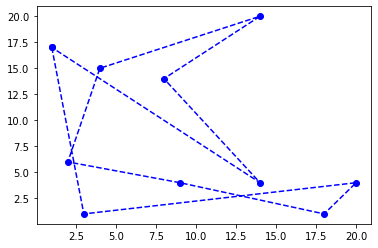

In [240]:
N_points = 10
x_max = 20
y_max = 20

route0 = get_random_points(N_points, x_max, y_max)
print(route0)
print(f"Total distance: {total_distance(route0)}")
print_route(route0)

In [241]:
final_route, final_distance = simulated_annealing(route0, 10000, 10000)

print(f"Final distance: {final_distance}")
print(final_route)
print_route(list(final_route))

Iteration:0, Temperature:10000, Distance:127.19186986120944, route:[[1, 17], [8, 14], [9, 4], [2, 6], [14, 20], [3, 1], [4, 15], [14, 4], [20, 4], [18, 1], [1, 17]]
Iteration:1, Temperature:10000.0, Distance:146.193553727079, route:[[1, 17], [20, 4], [4, 15], [14, 4], [14, 20], [18, 1], [8, 14], [2, 6], [3, 1], [9, 4], [1, 17]]
Iteration:2, Temperature:9900.990099009901, Distance:133.76683164931535 route:[[1, 17], [8, 14], [2, 6], [20, 4], [3, 1], [18, 1], [9, 4], [4, 15], [14, 4], [14, 20], [1, 17]]
Iteration:3, Temperature:9706.853038245, Distance:143.83978112166636, route:[[1, 17], [18, 1], [2, 6], [4, 15], [14, 4], [20, 4], [3, 1], [14, 20], [9, 4], [8, 14], [1, 17]]
Iteration:4, Temperature:9424.12916334466, Distance:119.50778781359953 route:[[1, 17], [8, 14], [2, 6], [4, 15], [20, 4], [3, 1], [14, 4], [18, 1], [9, 4], [14, 20], [1, 17]]
Iteration:5, Temperature:9061.662657062172, Distance:94.36848419490788 route:[[1, 17], [3, 1], [18, 1], [20, 4], [14, 4], [9, 4], [2, 6], [14, 20

TypeError: cannot unpack non-iterable NoneType object

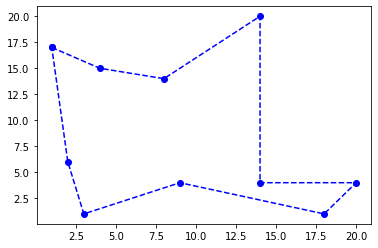

In [242]:
print_route([[1, 17], [4, 15], [8, 14], [14, 20], [14, 4], [20, 4], [18, 1], [9, 4], [3, 1], [2, 6], [1, 17]])

In [236]:
type(final_route)

list

In [237]:
type(total_distance)

function